In [327]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import ipywidgets as widgets
from IPython.display import display

In [239]:
path = '/content/drive/MyDrive/AML_Project/prices_final_2.csv'

In [240]:
data = pd.read_csv(path)

In [241]:
data.head()

,Car Name,Location,Model,Mileage (km),Fuel (Diesel/Petrol/Hybrid),Engine Cacity,Price (lac),Manual,Automatic
0,Suzuki Mehran 2018 II,Lahore,2018,53000,1,796,9.65,1,0
1,Suzuki Khyber 1993,Islamabad,1993,55555,1,1000,1.85,1,0
2,Toyota Vitz 2009 F 1.0,D.G.Khan,2009,123456,1,1000,17.35,0,1
3,Suzuki Alto 2019 R AGS,Karachi,2019,47000,1,660,20.80,0,1
4,Suzuki FX 1983,Lahore,1983,45388,1,800,1.99,1,0


In [242]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 837 entries, 0 to 836
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Car Name                     837 non-null    object 
 1   Location                     837 non-null    object 
 2   Model                        837 non-null    int64  
 3   Mileage (km)                 837 non-null    int64  
 4   Fuel (Diesel/Petrol/Hybrid)  837 non-null    int64  
 5   Engine Cacity                837 non-null    int64  
 6   Price (lac)                  837 non-null    float64
 7   Manual                       837 non-null    int64  
 8   Automatic                    837 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 59.0+ KB


In [243]:
data.dtypes

Car Name                        object
Location                        object
Model                            int64
Mileage (km)                     int64
Fuel (Diesel/Petrol/Hybrid)      int64
Engine Cacity                    int64
Price (lac)                    float64
Manual                           int64
Automatic                        int64
dtype: object

In [244]:
data['Mileage (km)'].astype(str).astype(int)
data['Fuel (Diesel/Petrol/Hybrid)'].astype(str).astype(int)
data['Engine Cacity'].astype(str).astype(int)
data['Car Name'].astype(str)
data['Location'].astype(str)
data['Price (lac)'].astype(float)

0       9.65
1       1.85
2      17.35
3      20.80
4       1.99
       ...  
832    73.50
833    17.25
834    12.50
835    13.50
836    13.00
Name: Price (lac), Length: 837, dtype: float64

In [245]:
data.dtypes

Car Name                        object
Location                        object
Model                            int64
Mileage (km)                     int64
Fuel (Diesel/Petrol/Hybrid)      int64
Engine Cacity                    int64
Price (lac)                    float64
Manual                           int64
Automatic                        int64
dtype: object

In [246]:
data.isnull().sum()

Car Name                       0
Location                       0
Model                          0
Mileage (km)                   0
Fuel (Diesel/Petrol/Hybrid)    0
Engine Cacity                  0
Price (lac)                    0
Manual                         0
Automatic                      0
dtype: int64

In [247]:
data.describe()

,Model,Mileage (km),Fuel (Diesel/Petrol/Hybrid),Engine Cacity,Price (lac),Manual,Automatic
count,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,2015.268817,79792.724014,1.039427,1482.814815,32.238447,0.335723,0.664277
std,6.432992,70079.642494,0.323887,611.479287,20.058240,0.472525,0.472525
min,1983.000000,487.000000,0.000000,660.000000,1.000000,0.000000,0.000000
25%,2012.000000,21898.000000,1.000000,1000.000000,18.400000,0.000000,0.000000
50%,2017.000000,69848.000000,1.000000,1500.000000,28.500000,0.000000,1.000000
75%,2021.000000,113357.000000,1.000000,1800.000000,43.000000,1.000000,1.000000
max,2022.000000,482021.000000,2.000000,5500.000000,98.000000,1.000000,1.000000


In [248]:
data.columns

Index(['Car Name', 'Location', 'Model', 'Mileage (km)',
       'Fuel (Diesel/Petrol/Hybrid)', 'Engine Cacity', 'Price (lac)', 'Manual',
       'Automatic'],
      dtype='object')

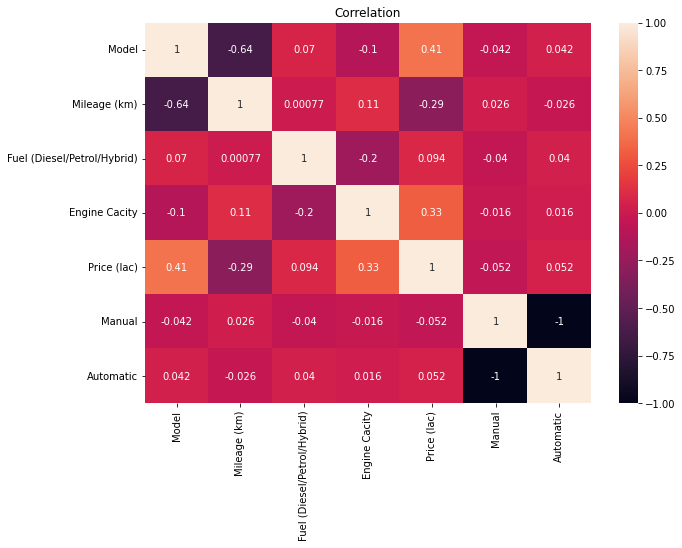

In [249]:
plt.figure(figsize= (10,7))
sns.heatmap(data.corr(), annot=True)
plt.title("Correlation")
plt.show()

Text(0, 0.5, 'Price')

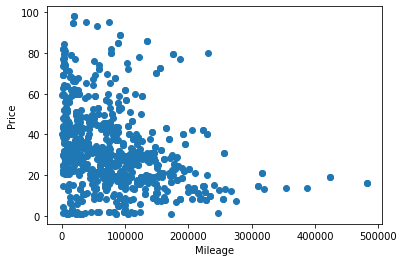

In [250]:
plt.scatter(data[['Mileage (km)']], data[['Price (lac)']])
plt.xlabel('Mileage')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

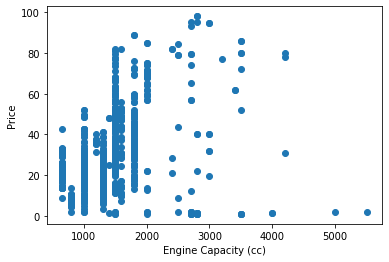

In [251]:
plt.scatter(data[['Engine Cacity']], data[['Price (lac)']])
plt.xlabel('Engine Capacity (cc)')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

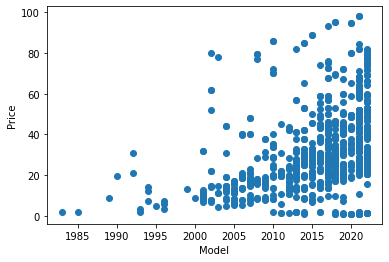

In [252]:
plt.scatter(data[['Model']], data[['Price (lac)']])
plt.xlabel('Model')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

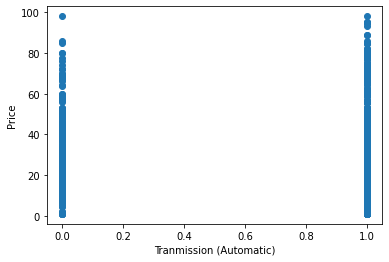

In [253]:
plt.scatter(data[['Automatic']], data[['Price (lac)']])
plt.xlabel('Tranmission (Automatic)')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

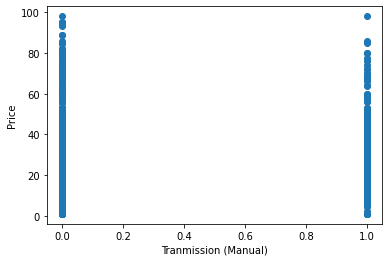

In [254]:
plt.scatter(data[['Manual']], data[['Price (lac)']])
plt.xlabel('Tranmission (Manual)')
plt.ylabel('Price')

In [255]:
# data = pd.get_dummies(data, columns = ['Location'], prefix="Location")
# data.head()

In [386]:
x = data.drop('Price (lac)', axis = 1)
x = x.drop('Car Name', axis=1)
x = x.drop('Fuel (Diesel/Petrol/Hybrid)', axis=1)

x = x.drop('Location', axis = 1)
y = data['Price (lac)']
x

,Model,Mileage (km),Engine Cacity,Manual,Automatic
0,2018,53000,796,1,0
1,1993,55555,1000,1,0
2,2009,123456,1000,0,1
3,2019,47000,660,0,1
4,1983,45388,800,1,0
...,...,...,...,...,...
832,2022,1200,1500,0,1
833,2018,94964,1000,0,1
834,2005,209340,1500,0,1
835,2005,387394,1500,0,1


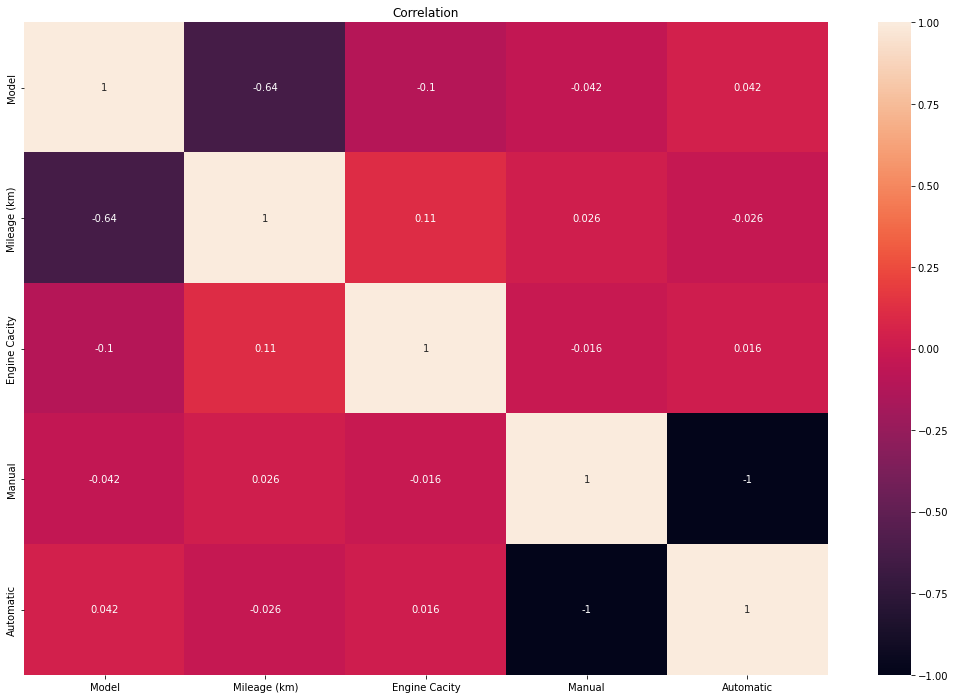

In [388]:
plt.figure(figsize= (18,12))
sns.heatmap(x.corr(), annot=True)
plt.title("Correlation")
plt.show()

In [389]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=101)

In [390]:
model = LinearRegression()

In [391]:
model.fit(X_train.values,y_train)

LinearRegression()

In [392]:
predictions = model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


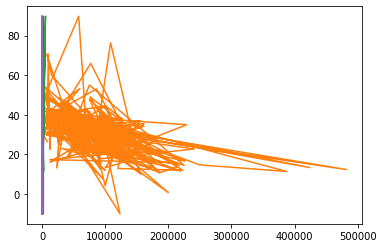

In [393]:
plt.plot(X_test, predictions)

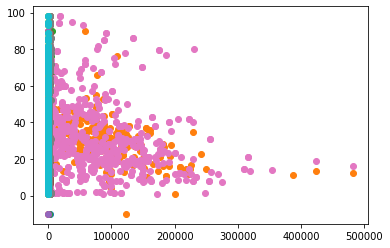

In [394]:
plt.plot(X_test, predictions, 'o')
plt.plot(X_train, y_train, 'o')

In [395]:
print(
  'mean_squared_error : ', metrics.mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', metrics.mean_absolute_error(y_test, predictions))

mean_squared_error :  258.0375582115185
mean_absolute_error :  9.934009556647112


In [418]:
#@title Number fields
Model = 2012 #@param {type:"slider", min:1983, max:2022, step:1}
Mileage = 114500 #@param {type:"slider", min:0, max:400000, step:500}
Engine_cc = 660 #@param {type:"integer", min:750, max:6000}
#Fuel = "Petrol"#@param ["Diesel", "Petrol", "Hybrid"]
Transmission = 'Automatic' #@param ['Automatic', 'Manual']

def conversion(Fuel, Transmission):
  if Fuel == "Diesel":
    Fuel = 0
  elif Fuel == "Petrol":
    Fuel =1
  else:
    Fuel =2
  if Transmission == 'Automatic':
    Auto = 1
    Man = 0
  else:
    Auto = 0
    Man = 1
  return Auto, Man



In [419]:
Auto, Man = conversion(Fuel, Transmission)
# input = np.reshape(np.array([Model, Mileage, Fuel, Engine_cc, Man, Auto]), (1,6))

button = widgets.Button(description="Predict")
output = widgets.Output()

def prediction(M, Mil, Eng, F, T):
    Auto, Man = conversion (F, T)
    #input = np.reshape(np.array([M, Mil, Fuel, Engine_cc, Man, Auto]), (-1,6))
    input = np.reshape(np.array([M, Mil, Engine_cc, Man, Auto]), (-1,5))
    #print(input.shape)
    #print(input)
    return(input)

#inp = prediction(Model, Mileage, Engine_cc, Fuel, Transmission)
inp = prediction(Model, Mileage, Engine_cc, Fuel, Transmission)

def on_button_clicked(b):
  #print(inp)
  pred_price = model.predict(inp)
  # Display the message within the output widget.
  with output:
    print(f"Predicted Price = {int(pred_price)} lac rupees")
button.on_click(on_button_clicked)
display(button, output)

Button(description='Predict', style=ButtonStyle())

Output()